<a href="https://colab.research.google.com/github/yoooobin/ESAA/blob/main/ESAA_OB_week3_2_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **9.2** 가우시안 혼합

- **가우시안 혼합 모델**Gaussian mixture model(GMM): 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델
- 하나의 가우시안 분포에서 생성된 모든 샘플 => 하나의 클러스터(타원형)
- GMM 변종 존재 => 사전에 가우시안 분포 개수 k를 알아야 함

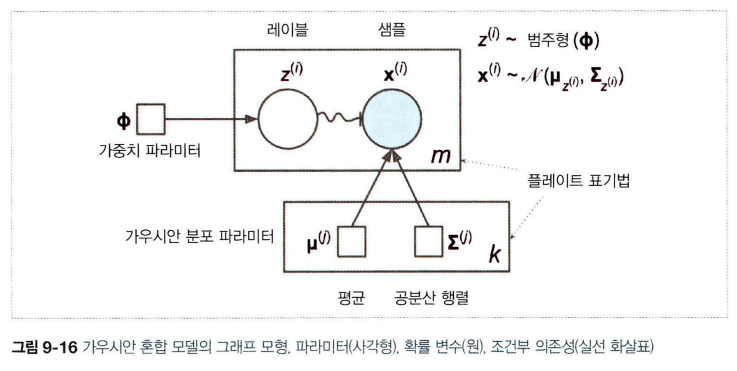

- 원: 확률 변수
- 사각형: 고정값(모델 파라미터)
- 큰 사각형: *플레이트 plate*, 사각형 안의 내용이 여러 번 반복
- 각 플레이트 오른쪽 아래 숫자: 얼마나 플레이트 안의 내용이 반복되는지 표시
- $z$: 가중치 벡터를 갖는 범주형 분포에서 샘플링,
- $x$: 해당하는 클러스터 $z$로 정의된 평균과 공분산 행렬 사용해 정규분포에서 샘플링
- 실선 화살표: 조건부 의존성
- 구불구불한 화살표: 스위치switch, $z$의 값에 따라 샘플 $x$가 다른 가우시안 분포에서 샘플링될 것
- 색이 채워진 원: 알려진 값(=*관측 변수*)

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import numpy as np

In [ ]:
from sklearn.mixture import GaussianMixture

X, y = make_moons(n_samples=1000, noise=0.05)
gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [ ]:
gm.weights_

array([0.19593621, 0.60655392, 0.19750986])

In [ ]:
gm.means_

array([[-0.75429501,  0.54186672],
       [ 0.49845963,  0.2490972 ],
       [ 1.75395637, -0.04540733]])

In [ ]:
gm.covariances_

array([[[ 0.04669743,  0.05705294],
        [ 0.05705294,  0.08519911]],

       [[ 0.18049845, -0.11263804],
        [-0.11263804,  0.29532213]],

       [[ 0.04558234,  0.05625032],
        [ 0.05625032,  0.084308  ]]])

- **기댓값-최대화**expectation-maximization(EM) 알고리즘
- 소프트 클러스터 할당 사용
- 클러스터의 *책임* = 클러스터에 속할 추정 확률로 샘플에 가중치가 적용

1. *기댓값 단계*: 샘플을 클러스터에 할당
2. *최대화 단계*: 클러스터 업데이트

In [ ]:
gm.converged_

True

In [ ]:
gm.n_iter_

18

In [ ]:
gm.predict(X)

array([1, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0,
       1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 0, 1,
       1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 0, 2, 1, 0, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1,
       1, 1, 0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 0, 2, 1, 0, 0, 1, 0, 2, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 0,
       2, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 0, 2,
       2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 2, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0,

In [ ]:
gm.predict_proba(X)

array([[1.20881660e-023, 1.00000000e+000, 3.54696261e-102],
       [6.88785585e-141, 9.99999997e-001, 2.55385682e-009],
       [8.61817674e-001, 1.38182326e-001, 2.37729015e-216],
       ...,
       [8.82709713e-022, 1.00000000e+000, 3.27976201e-106],
       [2.40585053e-033, 1.00000000e+000, 3.58111844e-084],
       [2.07560067e-228, 2.74393034e-003, 9.97256070e-001]])

In [ ]:
X_new, y_new = gm.sample(6)

In [ ]:
X_new

array([[-0.59748093,  0.73268176],
       [ 0.69540015,  0.46512434],
       [ 0.98911029, -0.04293982],
       [ 0.92461766, -0.12706956],
       [ 0.23981856,  0.59131333],
       [ 1.86230768,  0.16479261]])

In [ ]:
y_new

array([0, 1, 1, 1, 1, 2])

In [ ]:
gm.score_samples(X)

array([-1.38795721e+00, -1.64948725e+00, -1.04840085e+00, -1.65348553e+00,
       -1.55897793e-02, -5.05130038e-01, -1.69034721e+00, -7.21694265e-01,
       -1.73475919e+00, -1.44155455e+00, -1.92984713e+00, -1.01386116e-01,
       -1.91921860e+00, -1.01434322e+00, -1.52306471e+00, -1.87917531e+00,
       -1.72525465e+00, -3.80284237e-02, -1.67291787e+00, -1.58853866e+00,
       -1.66385787e+00, -3.75103957e-01, -2.29516861e+00, -6.07734016e-01,
       -6.44794589e-01, -1.43324153e+00, -1.58618955e+00, -1.66342735e+00,
       -1.89755049e+00, -1.23566397e+00, -1.53272193e+00, -1.00898728e+00,
       -1.90451810e+00, -1.40868565e+00, -1.54187790e+00, -1.62399454e+00,
       -1.58130387e+00, -2.01426411e+00, -6.76865366e-01, -1.98458399e+00,
       -1.72694901e+00, -1.73137448e+00, -1.70784412e+00, -4.53763244e-01,
       -1.38562444e+00,  3.26840874e-02, -1.33307343e+00, -1.45388648e+00,
       -6.41317488e-01, -1.70842519e+00, -1.87852867e+00, -1.92813379e+00,
       -1.59417764e+00, -

- **생성 모델**generative model: 새로운 샘플을 만들 수 있도록 함
- *score_samples()*로 확률 밀도 함수(probability density function)의 로그를 예측
- 샘플이 특정 지역에 대해 PDF 적분

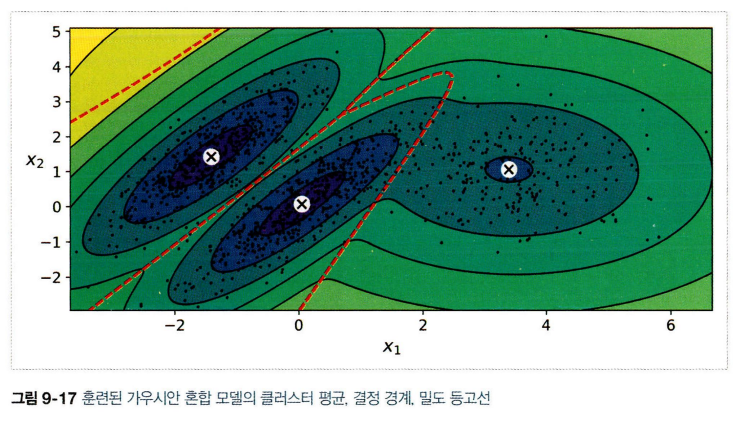

- 특성이나 클러스터가 많거나 샘플이 적을 때 => EM 최적의 솔루션 수렴 어려움
- 알고리즘이 학습할 파라미터 개수를 제한 => 클러스터의 모양과 방향의 범위를 제한
- 사이킷런 *covariance_type* 매개변수
- *spherical*: 모든 클러스터가 원형
- *diag*: 클러스터는 크기에 상관없이 어떤 타원형도 가능, 타원의 축은 좌표 축과 나란
- *tied*: 모든 클러스터가 동일한 타원 모양, 크기, 방향 가짐

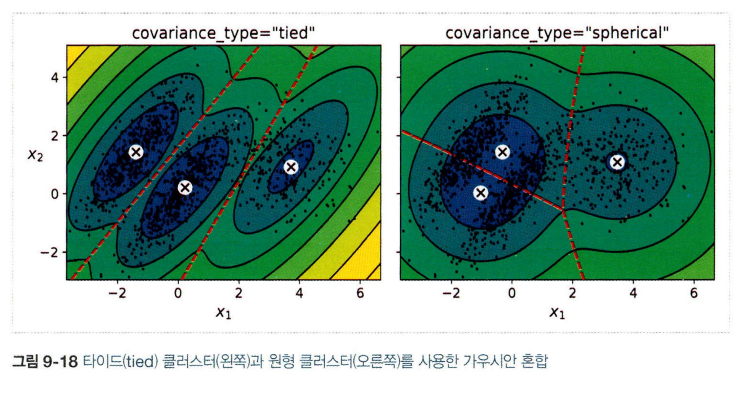

##### **9.2.1 가우시안 혼합을 사용한 이상치 탐지**

- **이상치 탐지**outlier detection: 보통과 많이 다른 샘플을 감지하는 작업
- 밀도가 낮은 지역에 있는 모든 샘플을 이상치 => 밀도 임곗값
- **특이치 탐지**novelty detection와 비슷한 작업

In [ ]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

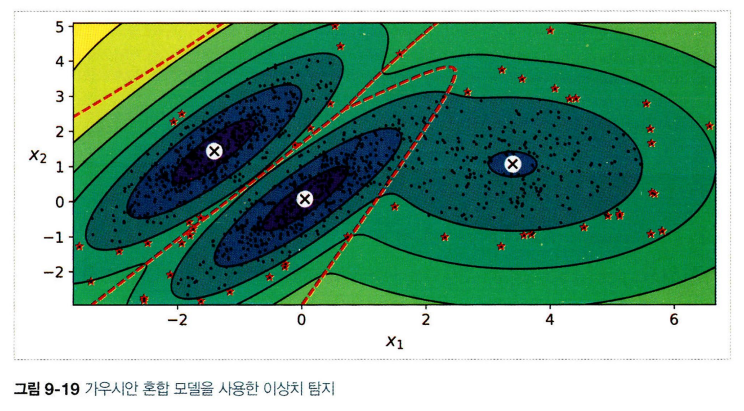

##### **9.2.2 클러스터 개수 선택하기**

- **BIC**Bayesian information criterion, **AIC**Akaike information criterion와 같은 *이론적 정보 기준*을 최소화하는 모델을 찾음

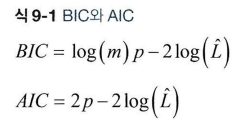

- $m$ = 샘플의 개수
- $p$ = 모델이 학습할 파라미터 개수
- $L$ = 모델의 *가능도 함수*의 최댓값

In [ ]:
gm.bic(X)

np.float64(2755.1710413946294)

In [ ]:
gm.aic(X)

np.float64(2671.739201651933)

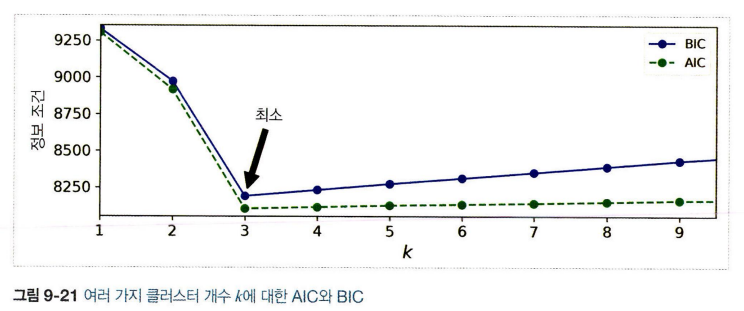

=> k=3에서 BIC, AIC 모두 가장 작음
- k=3이 최선의 선택
- *covariance_type* 매개변수에 대해 최선의 값 탐색 가능

##### **9.2.3 베이즈 가우시안 혼합 모델**

- 최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터의 가중치를 0으로 만드는 *BayesicanGaussianMixture* 클래스 사용
- 클러스터 개수 *n_components*를 최적의 클러스터 개수보다 크다고 믿을 만한 값으로 지정

In [ ]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.17, 0.13, 0.09, 0.17, 0.12, 0.1 , 0.13, 0.1 , 0.  , 0.  ])

- **베타 분포**beta distribution: 고정 범위 안에 놓인 값을 가진 확률 변수를 모델링할 때 자주 사용 => 0 ... 1
- 새로운 샘플이 작은 클러스터보다 큰 클러스터에 합류할 가능성이 높은 데이터셋에 잘 맞는 모델

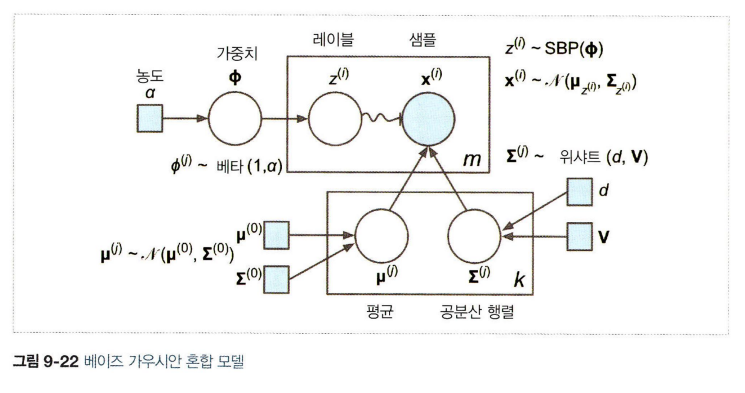

- 잠재 변수 $z$에 대한 사전 지식 **사전 확률**이라는 확률 분포 $p(z)$에 인코딩
- 데이터가 많을수록 사전 믿음은 중요하지 않음
- X가 주어졌을 때 z의 조건부 확률인 **사후 확률 분포** 계산

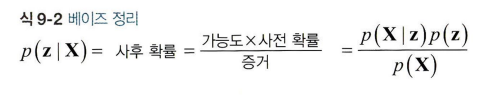

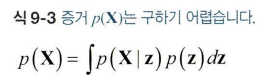

- 가우시안 혼합 모델에서 분모인 $p(X)$는 계산하기 힘듦 => 가능한 모든 z값에 대해 적분해야 하기 때문
- 클러스터 파라미터와 클러스터 할당 조합 고려해야 함
- **변분 추론**variational inference: 자체적인 변분 파라미터를 가진 분포 패밀리를 선택 후 $q(z)$가 $p(z|X)$의 좋은 근삿값이 되도록 파라미터를 최적화

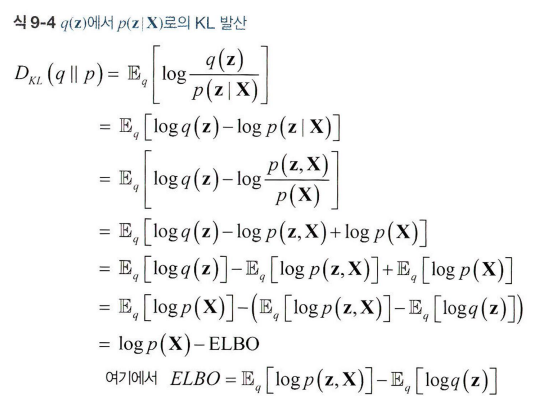

실전에서 ELBO 최대화하는 기법

- **평균장 변분 추론**mean field variational inference
- **블랙 박스 확률적 변분 추론**black box stochastic variational inference(BBSVI)

##### **9.2.4 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘**

- **PCA(inverse_transform() 메서드 다른 차원 축소 기법)**: 간단하고 매우 효과적
- **Fast-MSD(minimum covariance determinant)**: 데이터셋을 정제, 하나의 가우시안 분포에서 샘플이 생성되었고, 가우시안 분포에서 생성되지 않은 이상치로 데이터셋이 오염되었다고 가정
- **아이솔레이션 포레스트**: 고차원 데이터셋 이상치 감지를 위한 효율적 알고리즘. 무작위로 성장한 결정 트리로 구성된 랜덤 포레스트를 만듦
- **LOF(local outlier factor)**: 주어진 샘플 주위의 밀도와 이웃 주위의 밀도를 비교
- **one-class SVM**: 특이치 탐지, 고차원 데이터셋에 잘 작동하는 알고리즘